In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from collections import Counter
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve)

from Lab1.classification import model_selection, accuracy
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine

In [58]:
df = pd.read_csv('/home/piotr/Workspace/DataScience/InductiveDataAnalysis/data/raw_data/diabets.data')
features = df.columns[:-1].tolist()
print(df.shape)

(768, 9)


In [59]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Type
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [60]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Type
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
df['Type'].value_counts()

0    500
1    268
Name: Type, dtype: int64

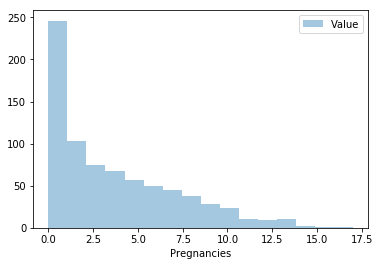

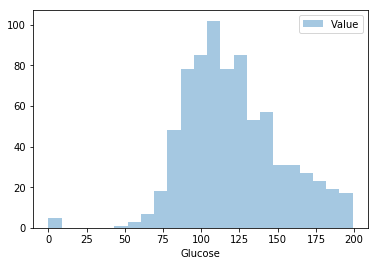

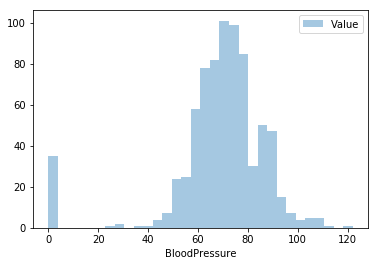

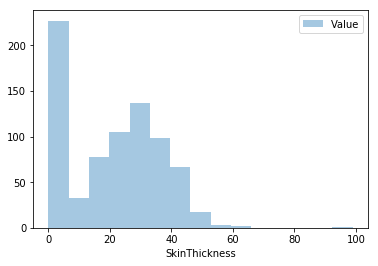

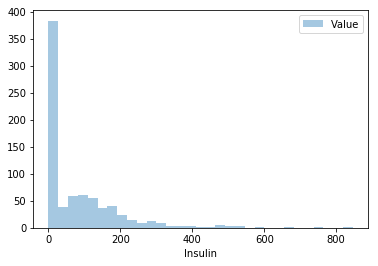

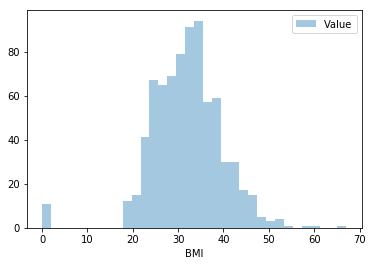

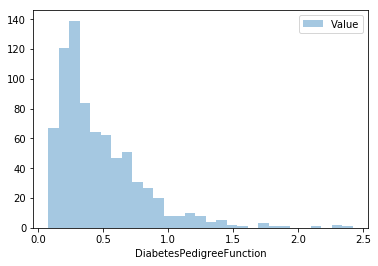

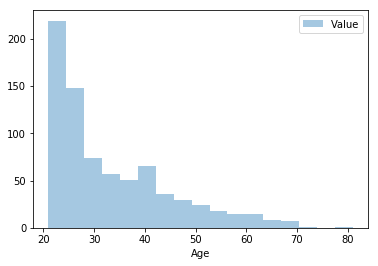

In [62]:
for feature in features:
    skew = df[feature].skew()
    sns.distplot(df[feature], label='Value', kde=False)
    plt.legend(loc='best')
    plt.show()

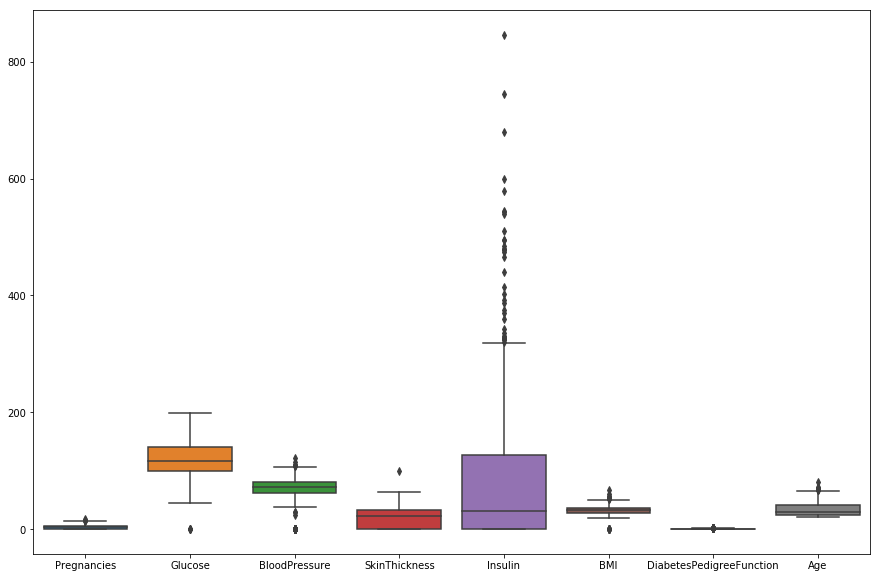

In [63]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df[features])

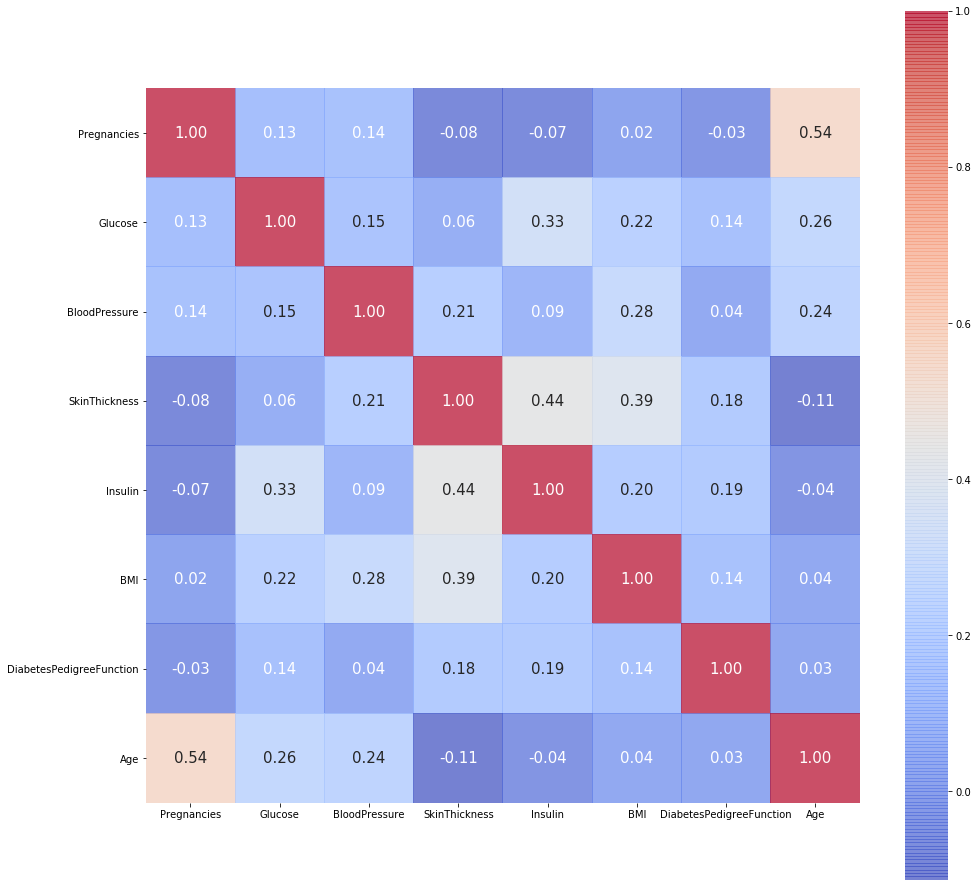

In [64]:
corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')

In [81]:
metrics = [accuracy, f1_score, precision_score, recall_score]
data = df[df.columns[:-1]].as_matrix()
target = df[df.columns[-1]].as_matrix()
model = GaussianNB()
result = model_selection(data, target, model, metrics, 4)

In [82]:
def make_value(value):
    return "{0:.4f} +/- {1:.4f}".format(value[0], value[1])

In [83]:
scores = pd.DataFrame(columns=['Raw Data'], 
                  index=['accuracy','f1_score','precission'])

In [84]:
scores['Raw Data'] = pd.Series({'accuracy': make_value(result[accuracy]), 
                            'f1_score': make_value(result[f1_score]), 
                            'precission': make_value(result[precision_score]), 
                            'recall': make_value(result[recall_score])})

In [85]:
scores

,Raw Data
accuracy,0.7591 +/- 0.0002
f1_score,0.7280 +/- 0.0003
precission,0.7367 +/- 0.0003
